# Modello di Rasch {#sec-rash-model}

**Prerequisiti**

- Leggere il capitolo 8, *Item Response Theory*, del testo *Principles of psychological assessment* di @petersen2024principles. 

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [5]:
# devtools::install_github("masurp/ggmirt")

# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(mirt, ltm, grid, TAM, ggmirt, latex2exp)

## Introduzione

La psicometria ha conosciuto un'evoluzione importante con l'introduzione della **Teoria della Risposta all'Item** (IRT). Questo approccio rappresenta un progresso rispetto alla CTT, soprattutto nella gestione e nella concettualizzazione degli errori di misurazione. Nel presente capitolo verranno esplorate le basi dell'IRT, evidenziandone le peculiarità e i vantaggi rispetto ai modelli tradizionali.

A differenza della CTT, che si concentra sull'analisi del punteggio totale ottenuto in un test, l'IRT focalizza l'attenzione sulle risposte ai singoli item. Ciò permette un'analisi più approfondita e precisa delle capacità di un individuo, considerando sia le caratteristiche specifiche degli item sia il livello di abilità della persona. Il nucleo dell'IRT è rappresentato dalla modellizzazione della probabilità che un individuo risponda correttamente a un determinato item, in funzione delle caratteristiche dell’item stesso e del livello di abilità del rispondente.

Un aspetto distintivo dell'IRT è la sua flessibilità nel trattare risposte categoriali, una tipologia di dati particolarmente comune nei test psicometrici, dove i partecipanti selezionano tra opzioni predefinite.

Nonostante i suoi vantaggi, l'implementazione dell'IRT comporta alcune sfide, tra cui la necessità di disporre di campioni di dati di dimensioni considerevoli e di affrontare una maggiore complessità nei modelli statistici. In questo capitolo introdurremo i modelli IRT e le curve caratteristiche degli item (ICC), seguendo la trattazione proposta da @debelak2022introduction.

## Curve Caratteristiche degli Item 

La CTT offre un metodo per stimare la relazione tra gli item di un test e il costrutto psicologico sottostante. Ad esempio, con un approccio basato sulla CTT, si può calcolare la correlazione tra il punteggio di un singolo item e il punteggio totale del test. Sebbene utile, questa metodologia fornisce solo una stima approssimativa della relazione tra un item e il costrutto che si intende misurare. L'IRT consente un’analisi più raffinata.

A differenza della CTT, che si concentra sul punteggio totale del test e la sua relazione con il costrutto, l’IRT si focalizza sulla relazione tra i singoli item e il costrutto. Questo approccio risponde a domande specifiche, come ad esempio: “Dato il livello di abilità di un individuo su un costrutto, qual è la probabilità che risponda *VERO* a un particolare item?”

L’IRT è un modello che permette di rappresentare le variabili latenti. In questo framework, il livello latente di un individuo su un costrutto (denotato con il simbolo **theta** (θ)) viene stimato sulla base delle sue risposte ai singoli item. **Theta** rappresenta il livello latente di abilità, o la posizione di una persona lungo un continuum psicologico sottostante.

Una delle rappresentazioni chiave dell’IRT è la **Curva Caratteristica dell’Item** (ICC). L’ICC è un grafico che descrive la probabilità stimata di fornire una risposta corretta (o di manifestare un determinato comportamento o sintomo) in funzione del livello di abilità latente di una persona. Solitamente, questa relazione è modellata utilizzando una funzione logistica, che produce una curva sigmoide: a bassi livelli di abilità la probabilità di rispondere correttamente è molto bassa, aumenta progressivamente a livelli intermedi e si appiattisce a livelli alti.

Le ICC sono strumenti fondamentali per valutare la qualità degli item. Ad esempio, un item affetto da **effetto soffitto** (tutti rispondono correttamente, indipendentemente dal livello di abilità) o da **effetto pavimento** (nessuno risponde correttamente se non a livelli molto alti di abilità) tende a fornire poche informazioni utili per distinguere tra individui con diversi livelli di abilità. Analizzare le ICC consente quindi di identificare quali item contribuiscono in modo sostanziale alla misurazione del costrutto e quali potrebbero necessitare di revisione o eliminazione.

## La Scala di Guttman

Per comprendere meglio il concetto di **Curva Caratteristica dell’Item** (ICC), è utile introdurre la **Scala di Guttman**, che stabilisce una relazione gerarchica tra la difficoltà degli item e le abilità degli individui. In una Scala di Guttman ideale, si assume che una persona con un determinato livello di abilità risponda correttamente a tutti gli item meno difficili e sbagli quelli più difficili. 

### Esempio di Scala di Guttman Perfetta

La seguente tabella mostra un esempio di una Scala di Guttman perfetta per cinque item, dove:

- **1** indica una risposta corretta.
- **0** indica una risposta errata.

| **Pattern di risposta** | **Item 1** | **Item 2** | **Item 3** | **Item 4** | **Item 5** |
|--------------------------|------------|------------|------------|------------|------------|
| 1                        | 0          | 0          | 0          | 0          | 0          |
| 2                        | 1          | 0          | 0          | 0          | 0          |
| 3                        | 1          | 1          | 0          | 0          | 0          |
| 4                        | 1          | 1          | 1          | 0          | 0          |
| 5                        | 1          | 1          | 1          | 1          | 0          |
| 6                        | 1          | 1          | 1          | 1          | 1          |

In questo modello ideale, le risposte corrette si accumulano man mano che il livello di abilità dell’individuo aumenta.

### Rappresentazione Grafica della Scala di Guttman

Graficamente, la Scala di Guttman può essere rappresentata tramite le **curve caratteristiche degli item (ICC)**, che mostrano:

- **Asse verticale**: la probabilità di rispondere correttamente a un item. Nella Scala di Guttman ideale, questa probabilità è binaria: 1 (risposta corretta) o 0 (risposta errata).
- **Asse orizzontale**: il livello di abilità dell’individuo.

In un test ideale basato su questa scala, un individuo risponde correttamente a tutti gli item con difficoltà inferiore o uguale al proprio livello di abilità, mentre sbaglia quelli con difficoltà superiore. Questo crea un modello di risposta scalare e prevedibile.

Le frecce nel grafico sottostante rappresentano cinque individui con diversi livelli di abilità. Ogni freccia indica il punto in cui l’abilità di una persona interseca le curve caratteristiche degli item. Secondo il modello ideale, ogni persona dovrebbe rispondere correttamente a tutti gli item posizionati a sinistra della propria abilità sul grafico (item meno difficili) e sbagliare quelli a destra (item più difficili).

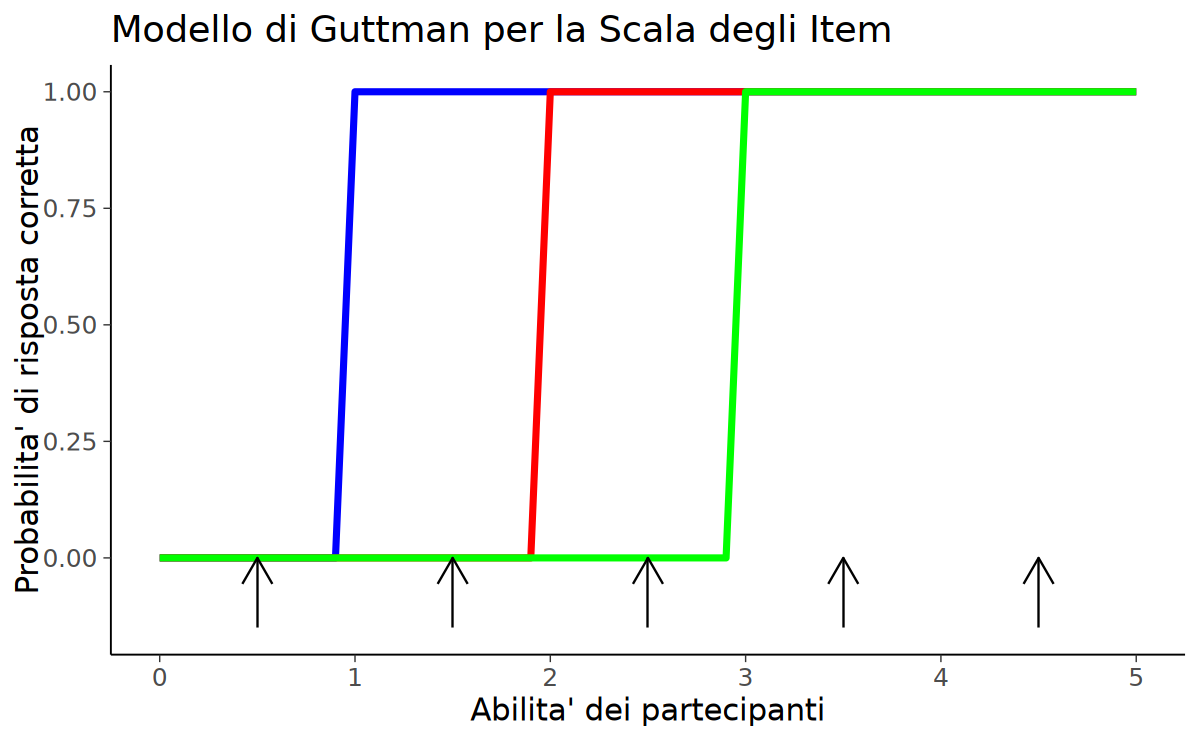

In [6]:
#| echo: false
#| fig-width: 3.5
#| fig-asp: .618
#| fig-align: center
#| out-width: 70%

# Data creation
abilita <- seq(0, 5, by = 0.1)
difficolta_item_1 <- 1
difficolta_item_2 <- 2
difficolta_item_3 <- 3
probabilita_item_1 <- as.numeric(abilita >= difficolta_item_1)
probabilita_item_2 <- as.numeric(abilita >= difficolta_item_2)
probabilita_item_3 <- as.numeric(abilita >= difficolta_item_3)
data <- data.frame(abilita, probabilita_item_1, probabilita_item_2, probabilita_item_3)

# Plot creation
p <- ggplot(data, aes(x = abilita)) +
    geom_line(aes(y = probabilita_item_1), color = "blue", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_2), color = "red", linewidth = 1.5) +
    geom_line(aes(y = probabilita_item_3), color = "green", linewidth = 1.5) +
    labs(
        x = "Abilita' dei partecipanti", y = "Probabilita' di risposta corretta",
        title = "Modello di Guttman per la Scala degli Item"
    )

y_posizione_frecce <- -0.15

# Add arrows using annotate to avoid repetition warnings
p <- p + annotate("segment",
    x = 0.5, xend = 0.5, y = y_posizione_frecce, yend = 0,
    arrow = arrow(), color = "black"
) +
    annotate("segment",
        x = 1.5, xend = 1.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    ) +
    annotate("segment",
        x = 2.5, xend = 2.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    ) +
    annotate("segment",
        x = 3.5, xend = 3.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    ) +
    annotate("segment",
        x = 4.5, xend = 4.5, y = y_posizione_frecce, yend = 0,
        arrow = arrow(), color = "black"
    )

# Print the plot
print(p)

Sebbene la Scala di Guttman sia un modello teorico utile, raramente si osserva nei dati reali a causa di fattori come:

- **Variabilità individuale**: Le risposte possono variare anche tra persone con lo stesso livello di abilità.
- **Errori di misurazione**: Gli item possono essere mal formulati o interpretabili in modo ambiguo.
- **Influenza di altri fattori**: Motivazione, attenzione e contesto possono influire sulle risposte.

Nonostante questi limiti, la Scala di Guttman rappresenta una base concettuale importante per comprendere la relazione gerarchica tra difficoltà degli item e abilità degli individui, servendo da ponte per lo sviluppo di modelli più complessi come quelli utilizzati nella IRT.

## Il Modello di Rasch

Il modello di Rasch rappresenta un'evoluzione rispetto allo scaling di Guttman, superandone i limiti. Ad esempio, consideriamo la competenza matematica, vista come una **variabile latente**: un tratto non direttamente osservabile che può essere inferito attraverso comportamenti misurabili. Supponiamo di utilizzare un test con cinque domande per valutare la competenza matematica. Le risposte a queste domande costituiscono le nostre osservazioni misurabili.

### Concetti Chiave del Modello di Rasch

Secondo il modello di Rasch, sia la difficoltà delle domande del test sia le abilità dei partecipanti sono rappresentate lungo un unico **continuum latente**. Le abilità più elevate si trovano verso l'estremità superiore, mentre quelle più basse si collocano verso l'estremità inferiore. Le domande del test sono disposte lungo questo continuum in base alla loro difficoltà, denotata da $\beta_i$ per il singolo item $i$. Analogamente, la competenza matematica di un individuo è rappresentata da $\theta$, che indica la sua posizione sul continuum.

Un individuo con abilità $\theta = 0$ avrà alta probabilità di rispondere correttamente a domande facili ($\beta = -2$) e una probabilità decrescente di rispondere correttamente a domande più difficili ($\beta > 0$). Quando la difficoltà di un item si avvicina al livello di abilità dell’individuo ($\beta \approx \theta$), la probabilità di una risposta corretta o errata diventa quasi equiprobabile, riflettendo una stima probabilistica.

La distanza tra la competenza dell’individuo ($\theta$) e la difficoltà dell’item ($\beta$) è cruciale: maggiore è la distanza, più certa sarà la risposta prevista (corretta o errata). Una distanza ridotta implica maggiore incertezza, migliorando la capacità del modello di cogliere sfumature nel comportamento di risposta.

::: {#exr-}

Consideriamo i dati di un test con cinque domande, i cui risultati (risposte corrette o errate) sono riportati di seguito:

In [2]:
math_dat <- rio::import(here::here("data", "deAyala", "Math.txt"))
head(math_dat)

,V1,V2,V3,V4,V5
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,0
2,1,1,1,0,0
3,1,0,0,0,0
4,1,1,1,0,0
5,1,0,1,1,0
6,1,1,1,0,0


Calcoliamo la media delle risposte corrette per ogni domanda per stimare la difficoltà degli item:

In [8]:
colMeans(math_dat) |> print()

   V1    V2    V3    V4    V5 
0.887 0.644 0.566 0.427 0.387 


Le medie ottenute mostrano che gli item sono ordinati per difficoltà crescente: $V1$ è il più facile e $V5$ il più difficile. Ora analizziamo la proporzione di risposte corrette in funzione del punteggio totale di ogni partecipante:

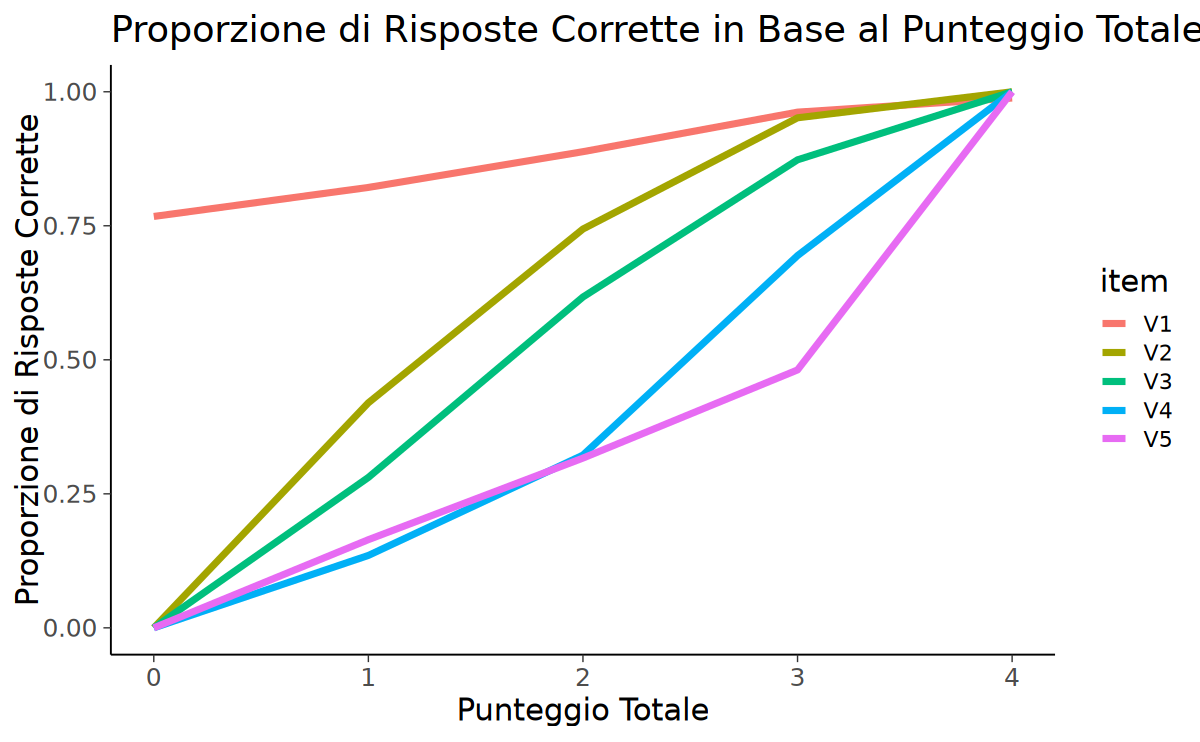

In [9]:
# Calcolo dei punteggi totali
math_dat2 <- math_dat
math_dat2$total_score <- rowSums(math_dat2[, -1])

# Preparazione dati per il grafico
plot_data <- lapply(names(math_dat2)[1:5], function(item) {
    math_dat2 %>%
        group_by(total_score) %>%
        summarise(proportion = mean(get(item) == 1)) %>%
        mutate(item = item)
})

plot_data <- do.call(rbind, plot_data)

# Creazione del grafico
ggplot(plot_data, aes(x = total_score, y = proportion, group = item, color = item)) +
    geom_line(linewidth = 1.5) +
    labs(
        x = "Punteggio Totale",
        y = "Proporzione di Risposte Corrette",
        title = "Proporzione di Risposte Corrette in Base al Punteggio Totale"
    )

:::

### Curve Caratteristiche degli Item (ICC)

L'analisi mostra che la probabilità di rispondere correttamente a un item aumenta con la competenza generale del partecipante. Questo risultato è coerente con il modello di Rasch, che postula che la difficoltà degli item e l’abilità dei partecipanti influenzino esclusivamente la probabilità di risposta corretta.

Le **curve caratteristiche degli item (ICC)** forniscono una rappresentazione visiva di questa relazione. Il modello di Rasch utilizza una funzione logistica per modellare la probabilità $P(X_{pi} = 1)$ che un partecipante $p$ con abilità $\theta_p$ risponda correttamente all’item $i$ con difficoltà $\beta_i$:

$$
P(X_{pi} = 1 | \theta_p, \beta_i) = \frac{e^{\theta_p - \beta_i}}{1 + e^{\theta_p - \beta_i}} = \frac{1}{1 + e^{-(\theta_p - \beta_i)}}.
$$ {#eq-rasch-model} 

Questa funzione mostra che la probabilità di una risposta corretta dipende dalla differenza $\theta_p - \beta_i$, che rappresenta la distanza tra abilità e difficoltà sul continuum.

### Interpretazione Grafica

Nel grafico seguente, ogni curva sigmoide rappresenta un item. La parallelità delle curve conferma che nel modello di Rasch solo la difficoltà degli item ($\beta_i$) varia, mantenendo costante la pendenza.

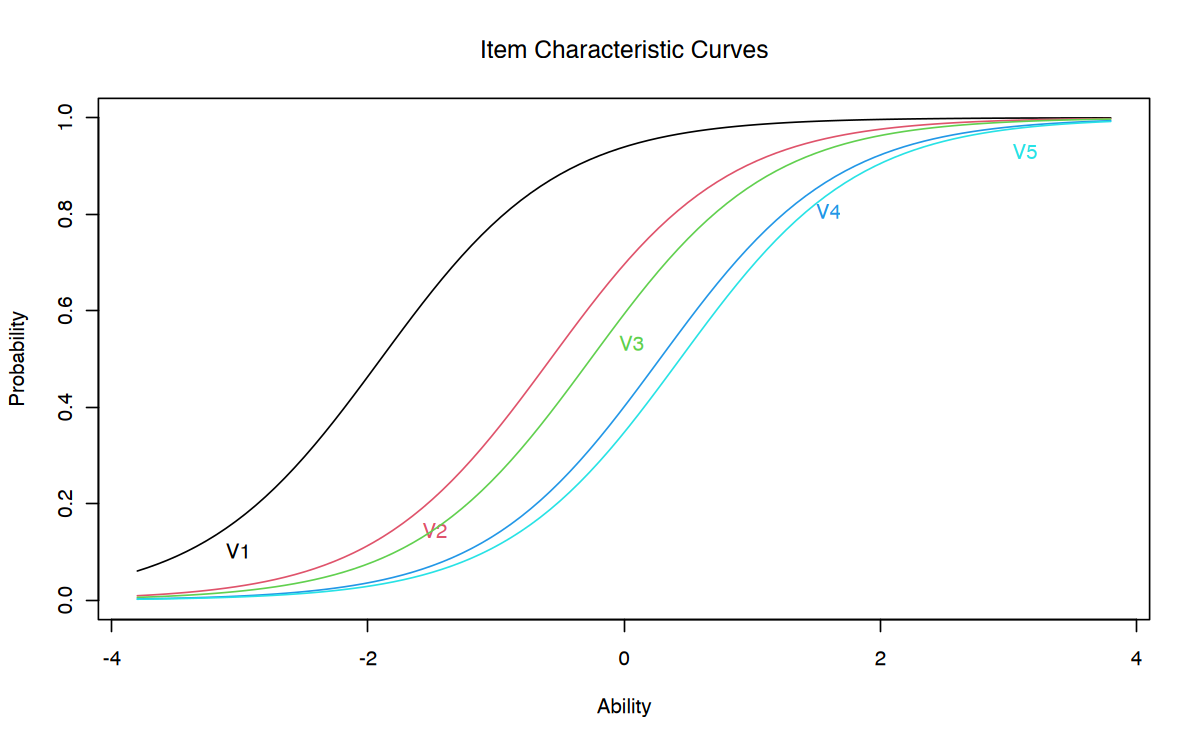

In [10]:
rasch_model <- rasch(math_dat)
plot(rasch_model, type = "ICC")

Le curve mostrano che:

- Item facili ($\beta_i < 0$) hanno alte probabilità di risposta corretta per partecipanti meno abili.
- Item difficili ($\beta_i > 0$) richiedono abilità superiori per una risposta corretta.

Il modello di Rasch dell'@eq-rasch-model calcola la probabilità di una risposta corretta all'item $i$ basandosi sulla posizione relativa sul continuum di abilità tra la persona $p$ e l'item $i$ (ovvero, in base alla differenza $\theta_p - \beta_i$). La probabilità che una persona con un certo livello di abilità $\theta_p$ risponda correttamente all'item $i$ dipende dalla differenza tra l'abilità del rispondente $\theta_p$ e la difficoltà dell'item $\beta_i$. Maggiore è questa differenza a favore dell'abilità, più alta sarà la probabilità di successo. In termini semplici, l'equazione afferma che la probabilità di una risposta corretta è funzione della distanza tra la posizione dell'individuo $p$ ($\theta_p$) e quella dell'item $i$ ($\beta_i$). L'equazione trasforma questa distanza, che potrebbe teoricamente variare da $-\infty$ a $+\infty$, in una probabilità confinata nell'intervallo [0, 1].

È importante sottolineare che, sebbene teoricamente le posizioni degli item ($\beta_i$) e delle persone ($\theta_p$) possano estendersi da $-\infty$ a $+\infty$, nella pratica esse si collocano generalmente tra -3 e +3. Nel contesto di test di competenza, queste posizioni rappresentano i vari livelli di difficoltà: item con valori inferiori a 0.0 sono considerati "facili" (ad esempio, -2.0), mentre quelli con valori superiori a 0.0 sono "difficili" (esempio, +2.0). Gli item intorno allo 0.0 sono di difficoltà intermedia e, mentre gli item "facili" sono spesso risolti correttamente anche da persone meno abili, quelli "difficili" tendono a essere superati solo da individui più competenti.

### Rappresentazioni Alternative della Funzione Logistica

La funzione logistica utilizzata nel modello di Rasch può essere scritta in due modi: con la funzione esponenziale sia al numeratore sia al denominatore (a sinistra), oppure equivalentemente con la funzione esponenziale solo al denominatore, seguita dal suo argomento negativo (a destra):

$$ 
\frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)} = \frac{1}{1 + \exp(-(\theta_p - \beta_i))} 
$$

Per dimostrare l'equivalenza delle due espressioni della funzione logistica nel modello di Rasch, seguiamo i seguenti  passaggi algebrici. Per semplificare il lato destro, utilizziamo la proprietà dell'esponenziale che afferma $e^{-x} = \frac{1}{e^x}$. Quindi, riscriviamo $\exp(-(\theta_p - \beta_i))$ come $\frac{1}{\exp(\theta_p - \beta_i)}$:

   $$ \frac{1}{1 + \frac{1}{\exp(\theta_p - \beta_i)}} $$

Il denominatore del lato destro diventa $1 + \frac{1}{\exp(\theta_p - \beta_i)}$. Per combinare i termini nel denominatore, otteniamo un denominatore comune:

   $$ \frac{1}{\frac{\exp(\theta_p - \beta_i) + 1}{\exp(\theta_p - \beta_i)}} $$

Simplificando ulteriormente, il denominatore diventa $\exp(\theta_p - \beta_i) + 1$, quindi l'intera espressione diventa:

   $$ \frac{1}{\exp(\theta_p - \beta_i) + 1} $$

Possiamo ora invertire la frazione per ottenere il lato sinistro dell'equazione originale:

   $$ \frac{\exp(\theta_p - \beta_i)}{\exp(\theta_p - \beta_i) + 1} $$

Quindi, abbiamo dimostrato che il lato sinistro e il lato destro dell'equazione originale sono effettivamente equivalenti.

::: {#exr-}

Per illustrare come il modello di Rasch venga utilizzato per calcolare i punti su una curva caratteristica dell'item, consideriamo il seguente problema. I valori dei parametri dell'item sono:

- a = 1 è il parametro di discriminazione dell'item,
- b = -0.5 è il parametro di difficoltà dell'item.

Troviamo la probabilità di rispondere correttamente a questo item al livello di abilità theta = 1.5. 

In [11]:
icc <- function(a, b, theta) {
    1 / (1 + exp(-a * (theta - b)))
}

a = 1
b = -0.5
theta = 1.5
icc(a, b, theta)

[1] 0.881

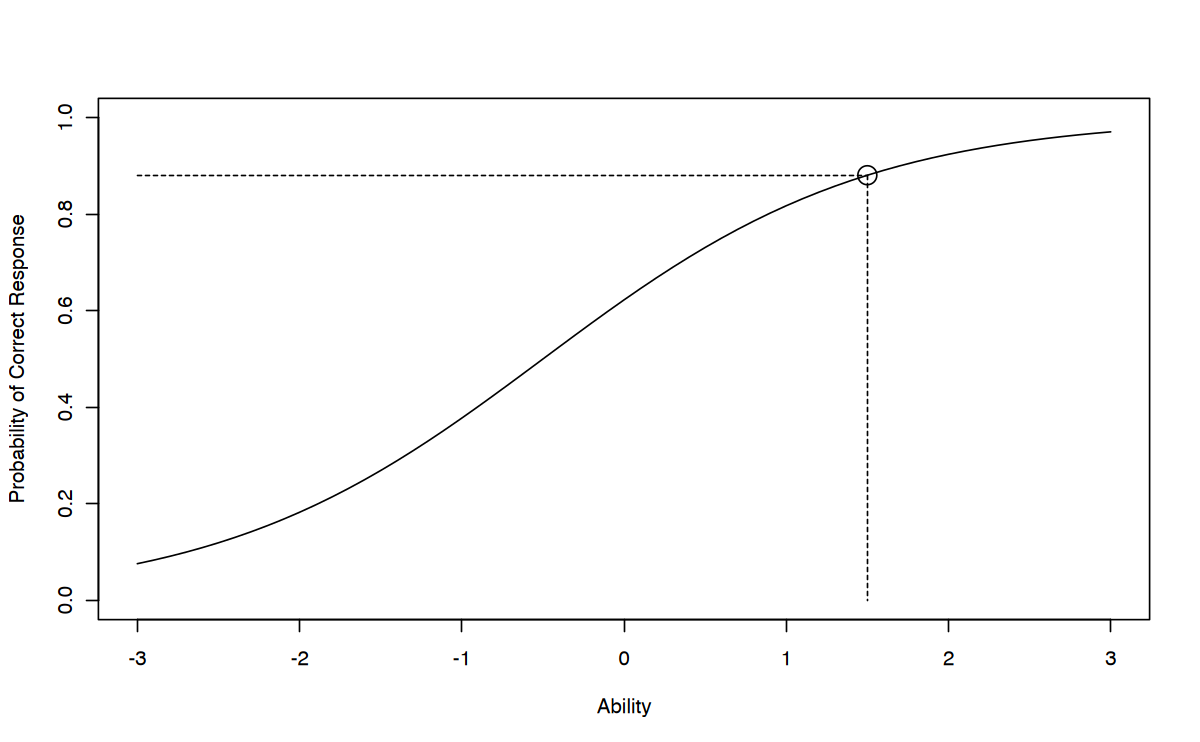

In [12]:
theta_range <- seq(-3, 3, .1)
plot(theta_range, icc(a, b, theta_range),
    type = "l", xlim = c(-3, 3), ylim = c(0, 1),
    xlab = "Ability", ylab = "Probability of Correct Response"
)
points(theta, icc(a, b, theta), cex=2)
segments(-3, icc(a, b, theta), theta, icc(a, b, theta), lty = "dashed")
segments(theta, icc(a, b, theta), theta, 0, lty = "dashed")

:::

## La Proprietà di Oggettività Specifica

Una delle caratteristiche fondamentali del modello di Rasch è la proprietà di **oggettività specifica**, che afferma che la differenza tra il logit della probabilità di rispondere correttamente a due diversi item, $i$ e $j$, è costante per ogni livello di abilità $\theta$. Questo implica che, indipendentemente dall'abilità di un rispondente, il confronto tra due item rimane stabile, riflettendo un principio fondamentale di misurazione oggettiva nel modello di Rasch. 

Nel modello di Rasch, la funzione logistica trasforma i logit — i logaritmi delle quote di probabilità di una risposta corretta rispetto a una errata — in probabilità effettive. I logit sono definiti come $\theta_p - \beta_i$, dove $\theta_p$ rappresenta il livello di abilità di una persona e $\beta_i$ la difficoltà dell'item. Questa trasformazione è cruciale per interpretare i dati raccolti nei test.

Matematicamente, il logit della probabilità di una risposta corretta a un item è espresso dalla seguente formula:

$$ 
\log \left( \frac{\text{Pr}(U_{pi} = 1 | \theta_p, \beta_i)}{\text{Pr}(U_{pi} = 0 | \theta_p, \beta_i)} \right) = \theta_p - \beta_i. 
$$

La probabilità $\pi$ di risposta corretta è calcolata così:

$$ 
\pi = \frac{\exp(\theta_p - \beta_i)}{1 + \exp(\theta_p - \beta_i)},
$$

e il suo complemento, $1 - \pi$, è dato da:

$$ 
1 - \pi = \frac{1}{1 + \exp(\theta_p - \beta_i)}. 
$$

Definendo le quote $O$ come $\exp(\theta_p - \beta_i)$, otteniamo una forma semplice per il logaritmo delle quote:

$$ 
\log(O) = \theta_p - \beta_i. 
$$

Questa formula dimostra che i logit sono direttamente proporzionali alla differenza tra l'abilità del rispondente e la difficoltà dell'item. Un incremento in questa differenza aumenta la probabilità di una risposta corretta, riflettendo che valori più alti sui logit indicano un vantaggio dell'abilità rispetto alla difficoltà dell'item.

### Implicazioni della Proprietà di Oggettività Specifica

L'oggettività specifica nel modello di Rasch significa che il confronto tra due item è indipendente dall'abilità dei rispondenti. Nella pratica, ciò si traduce nel fatto che le curve caratteristiche degli item (ICC) per diversi item sono parallele lungo la scala dei logit, poiché la differenza $\theta_p - \beta_i$ è costante tra gli item. Le curve per item con diverse difficoltà si intersecano a livelli diversi sull'asse verticale ma mantengono una pendenza costante, illustrando che ogni differenza nelle probabilità di risposta tra due item è esclusivamente attribuibile alle loro difficoltà intrinseche e non varia con il cambiamento dell'abilità dei partecipanti.

In sintesi, la rappresentazione logit fornisce non solo un modo per calcolare la probabilità di una risposta corretta, ma anche un metodo robusto per mantenere la comparabilità e la coerenza delle misure tra diversi item, garantendo così una valutazione equa e precisa delle abilità del rispondente.

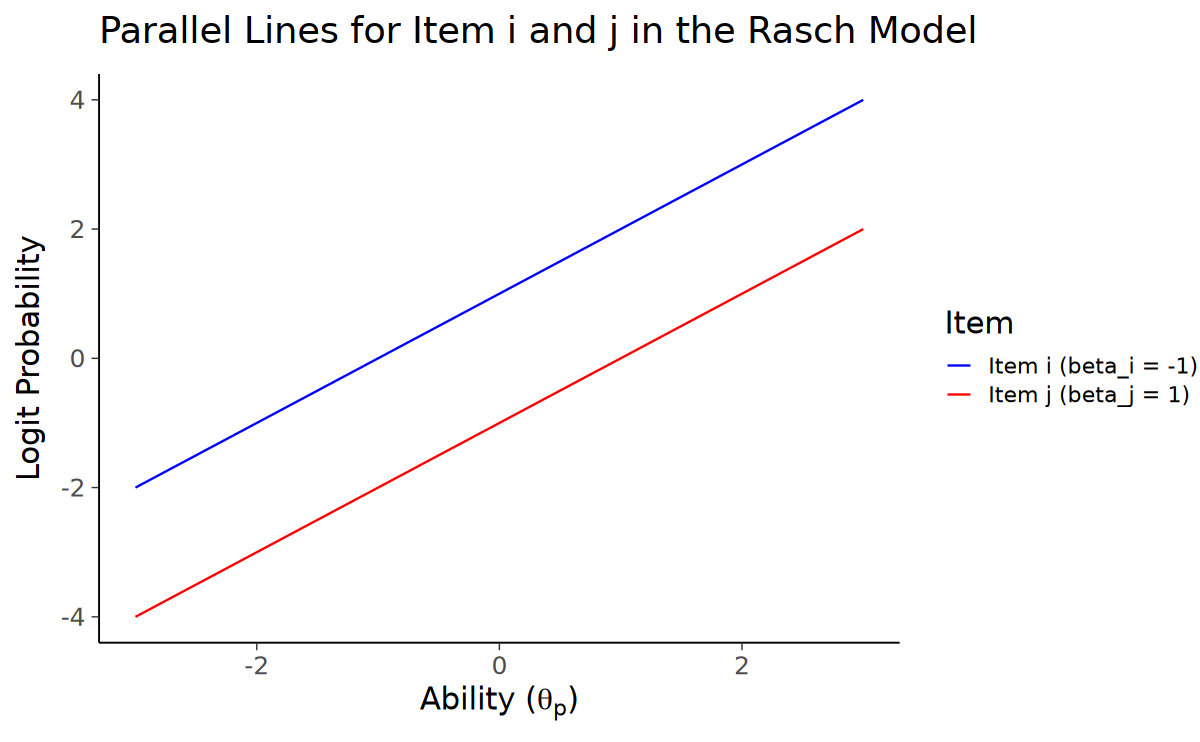

In [13]:
# Creazione di un dataframe con i valori di abilità (theta_p) e le difficoltà degli item (beta)
theta_p <- seq(-3, 3, length.out = 100)
beta_i <- -1
beta_j <- 1

# Calcolo dei logit per gli item i e j
logit_i <- theta_p - beta_i
logit_j <- theta_p - beta_j

data <- data.frame(
    Ability = c(theta_p, theta_p),
    Logit = c(logit_i, logit_j),
    Item = factor(c(rep("Item i (beta_i = -1)", length(theta_p)), rep("Item j (beta_j = 1)", length(theta_p))))
)

ggplot(data, aes(x = Ability, y = Logit, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "red")) +
    ggtitle(TeX("Parallel Lines for Item i and j in the Rasch Model")) +
    xlab(TeX("Ability ($\\theta_p$)")) +
    ylab(TeX("Logit Probability"))

## Il Modello di Rasch e l'Analisi Fattoriale

Per una migliore comprensione del Modello di Rasch, è utile confrontarlo con l'Analisi Fattoriale. Nonostante le loro differenze come metodologie statistiche, entrambi cercano un obiettivo comune: comprendere le dimensioni latenti sottostanti alle risposte osservate nei dati. Questo parallelo aiuta a mettere in luce le somiglianze e le differenze tra i due approcci.

Nell'Analisi Fattoriale, il modello tipico è espresso come $Y_i = \lambda_i \xi + \delta_i$, dove $Y_i$ è il punteggio osservato per l'item i-esimo, $\lambda_i$ rappresenta la saturazione fattoriale che indica quanto l'item è influenzato dal fattore latente $\xi$, e $\delta_i$ è il termine di errore specifico per quell'item. L'idea centrale è che, controllando per $\xi$, le correlazioni tra gli item $Y_i$ diventano nulle, poiché qualsiasi associazione comune è spiegata dal fattore latente.

D'altra parte, il Modello di Rasch adotta un approccio leggermente diverso, ma con lo stesso obiettivo fondamentale: identificare e gestire l'influenza di una dimensione latente (spesso chiamata abilità) sulle risposte agli item. In questo contesto, si considerano risposte dicotomiche (0 o 1), e si presume che la probabilità di una risposta corretta a un item sia una funzione logistica dell'abilità del rispondente $\theta$ e della difficoltà dell'item $\delta_i$.

La principale differenza tra il Modello di Rasch e l'Analisi Fattoriale risiede nella formulazione dei parametri. Mentre l'Analisi Fattoriale stima le saturazioni fattoriali per ciascun item, il Modello di Rasch assume che tutti gli item abbiano lo stesso potere discriminante, cioè sono ugualmente efficaci nel distinguere tra rispondenti con diversi livelli di abilità. Invece di concentrarsi sulle saturazioni fattoriali, il Modello di Rasch si concentra sulla stima dell'abilità dei rispondenti $\theta$ e sulla difficoltà degli item $\delta_i$, presupponendo che gli item siano equivalenti in termini di discriminazione.

In conclusione, sia il Modello di Rasch che l'Analisi Fattoriale mirano a isolare e controllare l'effetto di una dimensione latente sull'associazione tra gli item, cercando di spiegare le risposte osservate attraverso questa dimensione. Mentre l'Analisi Fattoriale si concentra sulla stima delle saturazioni fattoriali e sull'identificazione di fattori latenti comuni tra gli item, il Modello di Rasch si focalizza sulla stima dell'abilità dei rispondenti e sulla difficoltà degli item, fornendo un quadro dettagliato delle dinamiche che influenzano le risposte agli item.

## Considerazioni Conclusive

Il modello di Rasch si distingue notevolmente dalla Teoria Classica dei Test (CTT) per diversi aspetti fondamentali. In primo luogo, il modello di Rasch consente un'analisi dettagliata sia a livello di singolo item sia per l'intero strumento di misurazione. Questo contrasta con la CTT, che si concentra principalmente sull'analisi aggregata dell'intero test, esprimendo il punteggio totale con la formula $X = T + E$, dove $T$ indica l'abilità vera e $E$ l'errore. Il modello di Rasch, invece, modella la probabilità di una risposta corretta per ogni item specifico, seguendo l'approccio focalizzato sugli item proposto da Guttman.

L'approccio del modello di Rasch rappresenta una deviazione significativa dalla CTT poiché analizza le risposte osservate piuttosto che semplicemente sommarle. Questo cambio di paradigma offre numerosi vantaggi rispetto alla CTT:

**Precisione e Dettaglio**: L'analisi item per item nel modello di Rasch fornisce una comprensione molto più fine di come ciascun item funziona individualmente, permettendo di identificare specifiche aree di forza o debolezza sia nei test che nei rispondenti. Questo livello di dettaglio contribuisce a una misurazione più accurata e a una riduzione degli errori di misurazione.

**Separazione tra Attributi della Persona e Caratteristiche dell'Item**: Un vantaggio chiave del modello di Rasch rispetto alla CTT è la netta distinzione tra l'abilità della persona ($\theta_p$) e la difficoltà dell'item ($b_i$). Nel modello di Rasch, la difficoltà degli item è considerata una proprietà costante, indipendente dal gruppo di rispondenti, il che aumenta notevolmente la precisione e la flessibilità nella misurazione.

**Flessibilità nei Modelli di Risposta**: Il modello di Rasch può adattarsi a diversi tipi di formati di domanda, inclusi quelli a scelta multipla, le scale Likert, e le domande aperte, permettendo un'analisi complessiva che cattura meglio la cognizione e il comportamento umano.

**Valutazione Adattiva**: L'IRT, e in particolare il modello di Rasch, permette valutazioni personalizzate basate sul livello di abilità dei rispondenti. Questo approccio riduce gli errori di misurazione, fornendo informazioni più precise e utili.

**Analisi Approfondita degli Item**: Il modello di Rasch consente un'analisi dettagliata degli item, valutando aspetti come la discriminazione, la difficoltà e i parametri di indovinamento. Queste informazioni sono essenziali per il miglioramento continuo degli item e dei test.

Sebbene il modello di Rasch sia ampiamente apprezzato per la sua eleganza matematica e la sua applicazione pratica, è anche oggetto di critiche per le sue assunzioni relativamente restrittive, che alcuni studiosi ritengono limitino la sua capacità di catturare la complessità delle risposte agli item in scenari reali. Tuttavia, le sue assunzioni di base fornicono un quadro robusto per l'analisi dei dati, sostenendo l'invarianza delle proprietà degli item e delle abilità delle persone attraverso diversi contesti e gruppi di rispondenti.

## Session Info

In [13]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggmirt_0.1.0      latex2exp_0.9.6   TAM_4.2-21        CDM_8.2-6        
 [5] mvtnorm_1.3-1     ltm_1.2-0         polycor_0.8-1     msm_1.8          
 [9] MASS_7.3-61       mirt_1.42         lattice_0.22-6    ggokabeito_0.1.0 
[13] viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0      ggExtra_0.10.1   
[17] bayesplot_1.11.1  gridExtra_2.3     patchwork_1.3.0   semTools_0.5-6   
[21] semPlot_1.1.6     lavaan_0.6-18     psych_2.4.6.26    scales_1.3.0     
[25] ma